In [1]:
import os
import json
from datetime import datetime
import xml.etree.ElementTree as ET
from PIL import Image

In [2]:
cwd = os.getcwd()

train_images = os.listdir("./images/train")

idx = 0
train_image_path = os.path.join(cwd, "images", "train", train_images[idx])


len(train_images), train_images[0], train_image_path

(779,
 'Town01_001020.png',
 'c:\\Users\\yunus\\Documents\\Code\\GitHub\\avs\\Carla-COCO-Object-Detection-Dataset\\images\\train\\Town01_001020.png')

In [3]:
train_image_path

'c:\\Users\\yunus\\Documents\\Code\\GitHub\\avs\\Carla-COCO-Object-Detection-Dataset\\images\\train\\Town01_001020.png'

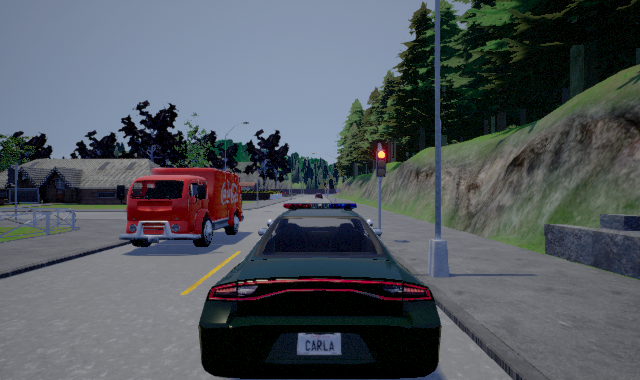

In [4]:
idx = 18
train_image_path = os.path.join(cwd, "images", "train", train_images[idx])
img = Image.open(train_image_path)

# Convert to RGB if it has an alpha channel
if img.mode == 'RGBA':
    img = img.convert('RGB')

# idx += 1

img

In [5]:
train_labels = os.listdir("./labels/train")
train_label_path = os.path.join(cwd, "labels", "train", train_labels[idx])

len(train_labels), train_labels[idx], train_label_path

(779,
 'Town01_002100.xml',
 'c:\\Users\\yunus\\Documents\\Code\\GitHub\\avs\\Carla-COCO-Object-Detection-Dataset\\labels\\train\\Town01_002100.xml')

In [6]:
tree = ET.parse(train_label_path)
root = tree.getroot()

In [7]:
label2idx = {}

with open("labels.txt", "rb") as file:
    for line_number, line in enumerate(file, start=1):
        # 'start=1' ensures line numbers are 1-indexed
        line = line.decode('utf-8').strip()
        if line == "motobike":
            line = "motorbike"
        elif line == "vehicle":
            line = "automobile"
        label2idx[line] = line_number

idx2label = {v: k for k, v in label2idx.items()}
label2idx

{'automobile': 1,
 'bike': 2,
 'motorbike': 3,
 'traffic_light': 4,
 'traffic_sign': 5}

## licenses
The licenses section provides details about the licenses of images included in the dataset, so you can understand how you are allowed to use them in your work. Below is an example of license info.

```json
"licenses": [
   {
       "url": "https://creativecommons.org/licenses/by-nc-sa/4.0/",
       "id": 1,
       "name": "Attribution-NonCommercial-ShareAlike 4.0 International"
   },
   {
       "url": "https://creativecommons.org/licenses/by-nc/4.0/",
       "id": 2,
       "name": "Attribution-NonCommercial 4.0 International"
   }
]
```

In this example, the "licenses" field is an array containing multiple license objects. Each license object has three fields: "url," "id," and "name." The "url" field contains the URL of the license, the "id" field is a unique identifier for the license, and the "name" field contains the name of the license.

## categories
The "categories" field in the COCO JSON is a list of objects that define the different categories or classes of objects in the dataset. Each object in the list contains the following fields:

* **"id"**: a unique integer identifier for the category
* **"name"**: the name of the category
* **"supercategory"**: an optional field specifying a broader category than the current one
For example, in a COCO dataset of images containing different types of vehicles, the "categories" field might look like this:

```json
"categories": [
   {
       "id": 1,
       "name": "car",
       "supercategory": "vehicle"
   },
   {
       "id": 2,
       "name": "truck",
       "supercategory": "vehicle"
   }
]
```

## images
The "images" field is an array that contains information about each image in the dataset. Each element in the array is a dictionary that contains the following key-value pairs:

* **"id"**: integer, a unique image id
* **"width"**: integer, the width of the image
* **"height"**: integer, the height of the image
* **"file_name"**: string, the file name of the image
* **"license"**: integer, the license id of the image
* **"flickr_url"**: string, the URL of the image on Flickr (if available)
* **"coco_url"**: string, the URL of the image on the COCO website (if available)
Here is an example of the "images" field in a COCO JSON file:

```json
"images": [
   {
       "id": 1,
       "width": 640,
       "height": 480,
       "file_name": "000000397133.jpg",
       "license": 1,
       "flickr_url": "https://www.flickr.com/photos/adrianrosebrock/397133",
       "coco_url": "http://images.cocodataset.org/val2017/000000397133.jpg",
       "date_captured": "2013-11-14 17:02:52"
   },
   {
       "id": 2,
       "width": 427,
       "height": 240,
       "file_name": "000000037777.jpg",
       "license": 1,
       "flickr_url": "https://www.flickr.com/photos/adrianrosebrock/37777",
       "coco_url": "http://images.cocodataset.org/val2017/000000037777.jpg",
       "date_captured": "2013-11-14 17:02:52"
   },
   ...
]
```

## segmentation
The segmentation field in the COCO JSON refers to the object instance segmentation masks for an image. The segmentation field is an array of dictionaries, and each dictionary represents a single object instance in the image. Each dictionary contains a "segmentation" key, an array of arrays representing the pixel-wise segmentation mask for that object instance.

Example of a segmentation field in COCO JSON:
```json
"annotations": [
   {
       "segmentation": [
           [
               [x1, y1],
               [x2, y2],
               [x3, y3],
               ...
           ]
       ],
       "area": 1000,
       "iscrowd": 0,
       "image_id": 1,
       "bbox": [x, y, width, height],
       "category_id": 1,
       "id": 1
   },
   {
       "segmentation": [
           [
               [x1, y1],
               [x2, y2],
               [x3, y3],
               ...
           ]
       ],
       "area": 800,
       "iscrowd": 0,
       "image_id": 1,
       "bbox": [x, y, width, height],
       "category_id": 2,
       "id": 2
   }
]
```
In this example, the two object instances in the image are represented by a dictionary in the "annotations" array. The "segmentation" key in each dictionary is an array of arrays, where each array represents a set of x and y coordinates that make up the pixel-wise segmentation mask for that object instance.

The other keys in the dictionary provide additional information about the object instance, such as its bounding box, area, and category.

In [8]:
# Initialize COCO data structure
coco_train_data = {
    "info": {
        "year": datetime.utcnow().year,
        "version": "2.0",
        "description": "COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)",
        "contributor": "DanielHfnr, yunusskeete",
        "url": "",
        "date_created": datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    },
    "images": [],
    "annotations": [],
    "categories": [{"id": k, "name": v, "supercategory": "traffic_control" if "traffic" in v else "vehicle"} for k, v in idx2label.items()],
    "licenses": [
        {
            "url": "https://opensource.org/license/mit/",
            "id": 1,
            "name": "MIT License"
        }
    ]
}
coco_train_data

{'info': {'year': 2023,
  'version': '2.0',
  'description': 'COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)',
  'contributor': 'DanielHfnr, yunusskeete',
  'url': '',
  'date_created': '2023-11-29 12:27:40'},
 'images': [],
 'annotations': [],
 'categories': [{'id': 1, 'name': 'automobile', 'supercategory': 'vehicle'},
  {'id': 2, 'name': 'bike', 'supercategory': 'vehicle'},
  {'id': 3, 'name': 'motorbike', 'supercategory': 'vehicle'},
  {'id': 4, 'name': 'traffic_light', 'supercategory': 'traffic_control'},
  {'id': 5, 'name': 'traffic_sign', 'supercategory': 'traffic_control'}],
 'licenses': [{'url': 'https://opensource.org/license/mit/',
   'id': 1,
   'name': 'MIT License'}]}

In [9]:
# Extract image information
width = int(root.find("size/width").text)
height = int(root.find("size/height").text)

image_info = {
    "id": "1",
    "width": width,
    "height": height,
    "file_name": root.find("filename").text,
    "license": 1,
    "date_captured": datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
}
image_info

{'id': '1',
 'width': 640,
 'height': 380,
 'file_name': 'Town01_002100.png',
 'license': 1,
 'date_captured': '2023-11-29 12:27:40'}

In [10]:
coco_train_data["images"].append(image_info)

# Extract object annotations
for annotation_id, obj in enumerate(root.findall("object"), 1):
    category_name = obj.find("name").text
    if category_name == "motobike":
        category_name = "motorbike"
    elif category_name == "vehicle":
        category_name = "automobile"
    category_id = label2idx[category_name]

    x_min, y_min, x_max, y_max = int(obj.find("bndbox/xmin").text), int(obj.find("bndbox/ymin").text), int(obj.find("bndbox/xmax").text), int(obj.find("bndbox/ymax").text)
    abs_width, abs_height = (x_max - x_min), (y_max - y_min)
    # norm_width, norm_height = round(abs_width / width, 4), round(abs_height / height, 4)

    bbox = [
        x_min,
        y_min,
        # norm_width,
        # norm_height
        abs_width,
        abs_height
    ]

    annotation_info = {
        "id": annotation_id,
        "image_id": "1",
        "category_id": category_id,
        "bbox": bbox,
        "area": abs_width * abs_height,
        "iscrowd": 0,
        "segmentation": [],
    }

    coco_train_data["annotations"].append(annotation_info)
coco_train_data["annotations"]

[{'id': 1,
  'image_id': '1',
  'category_id': 1,
  'bbox': [198, 203, 244, 176],
  'area': 42944,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 2,
  'image_id': '1',
  'category_id': 1,
  'bbox': [119, 168, 125, 79],
  'area': 9875,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 3,
  'image_id': '1',
  'category_id': 4,
  'bbox': [376, 145, 10, 38],
  'area': 380,
  'iscrowd': 0,
  'segmentation': []}]

In [11]:
coco_train_data

{'info': {'year': 2023,
  'version': '2.0',
  'description': 'COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)',
  'contributor': 'DanielHfnr, yunusskeete',
  'url': '',
  'date_created': '2023-11-29 12:27:40'},
 'images': [{'id': '1',
   'width': 640,
   'height': 380,
   'file_name': 'Town01_002100.png',
   'license': 1,
   'date_captured': '2023-11-29 12:27:40'}],
 'annotations': [{'id': 1,
   'image_id': '1',
   'category_id': 1,
   'bbox': [198, 203, 244, 176],
   'area': 42944,
   'iscrowd': 0,
   'segmentation': []},
  {'id': 2,
   'image_id': '1',
   'category_id': 1,
   'bbox': [119, 168, 125, 79],
   'area': 9875,
   'iscrowd': 0,
   'segmentation': []},
  {'id': 3,
   'image_id': '1',
   'category_id': 4,
   'bbox': [376, 145, 10, 38],
   'area': 380,
   'iscrowd': 0,
   'segmentation': []}],
 'categories': [{'id': 1, 'name': 'automobile', 'supercategory': 'vehicle'},
  {'id': 2, 'name': 'bike', 'supercategory': 'vehicle'},
  {'id':

## annotations
The annotations field in the COCO JSON file is a list of annotation objects that provide detailed information about the objects in an image. Each annotation object contains information such as the object's class label, bounding box coordinates, and segmentation mask.

```json
"annotations": [
   {
       "id": 1,
       "image_id": 1,
       "category_id": 1,
       "segmentation": [
           [
               [
                   56.97,
                   56.97
               ],
               [
                   56.97,
                   56.97
               ],
               ...
           ]
       ],
       "area": 2351.45,
       "bbox": [
           56.97,
           56.97,
           56.97,
           56.97
       ],
       "iscrowd": 0
   }
   ...
]
```

## bbox
The "bbox" field refers to the bounding box coordinates for an object in an image. The bounding box is represented by four values: the x and y coordinates of the top-left corner and the width and height of the box. These values are all normalized, representing them as fractions of the image width and height.

Here is an example of the "bbox" field in a COCO JSON file:
```json
{
   "annotations": [
       {
           "id": 1,
           "image_id": 1,
           "category_id": 1,
           "bbox": [0.1, 0.2, 0.3, 0.4],
           "area": 0.12,
           "iscrowd": 0
       },
       {
           "id": 2,
           "image_id": 1,
           "category_id": 2,
           "bbox": [0.5, 0.6, 0.7, 0.8],
           "area": 0.42,
           "iscrowd": 0
       }
   ]
}
```

In this example, the first annotation has a bounding box with the top-left corner at (0.1, 0.2) and a width and height of 0.3 and 0.4, respectively. The second annotation has a bounding box with the top-left corner at (0.5, 0.6) and a width and height of 0.7 and 0.8, respectively.

In [12]:
from typing import List, Tuple, Any
from datetime import datetime

def xml_to_coco(
        xml_file: str,
        license: int = 1,
        date_captured: str = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
) -> Tuple[dict[str, Any], List[dict[str, Any]]]:
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    annotations = []

    file_name = root.find("filename").text
    # start_idx = file_name.find("_") + 1
    end_idx = file_name.find(".")
    image_id = file_name[:end_idx]

    # Extract image information
    width = int(root.find("size/width").text)
    height = int(root.find("size/height").text)

    image_info = {
        "id": image_id,
        "width": width,
        "height": height,
        "file_name": file_name,
        "license": license,
        "date_captured": date_captured
    }

    # Extract object annotations
    for annotation_id, obj in enumerate(root.findall("object"), 1):
        category_name = obj.find("name").text
        if category_name == "motobike":
            category_name = "motorbike"
        elif category_name == "vehicle":
            category_name = "automobile"
        category_id = label2idx[category_name]

        x_min, y_min, x_max, y_max = int(obj.find("bndbox/xmin").text), int(obj.find("bndbox/ymin").text), int(obj.find("bndbox/xmax").text), int(obj.find("bndbox/ymax").text)
        abs_width, abs_height = (x_max - x_min), (y_max - y_min)
        # norm_width, norm_height = round(abs_width / width, 4), round(abs_height / height, 4)

        bbox = [
            x_min,
            y_min,
            # norm_width,
            # norm_height
            abs_width,
            abs_height
        ]

        annotation_info = {
            "id": annotation_id,
            "image_id": image_id,
            "category_id": category_id,
            "bbox": bbox,
            "area": abs_width * abs_height,
            "iscrowd": 0,
            "segmentation": [],
        }
        annotations.append(annotation_info)

    return (image_info, annotations)

In [13]:
# Initialize COCO data structure
coco_train_data = {
    "info": {
        "year": datetime.utcnow().year,
        "version": "2.0",
        "description": "COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)",
        "contributor": "DanielHfnr, yunusskeete",
        "url": "",
        "date_created": datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    },
    "images": [],
    "annotations": [],
    "categories": [{"id": k, "name": v, "supercategory": "traffic_control" if "traffic" in v else "vehicle"} for k, v in idx2label.items()],
    "licenses": [
        {
            "url": "https://opensource.org/license/mit/",
            "id": 1,
            "name": "MIT License"
        }
    ]
}

for idx, train_label in enumerate(train_labels):
    if idx % 100 == 0:
        print(idx)
    train_label_path = os.path.join(cwd, "labels", "train", train_label)

train_label = "Town01_011940.xml"
train_label_path = os.path.join(cwd, "labels", "train", train_label)
image, annotations = xml_to_coco(train_label_path)

0
100
200
300
400
500
600
700


In [14]:
image

{'id': 'Town01_011940',
 'width': 640,
 'height': 380,
 'file_name': 'Town01_011940.png',
 'license': 1,
 'date_captured': '2023-11-29 12:27:40'}

In [15]:
annotations

[{'id': 1,
  'image_id': 'Town01_011940',
  'category_id': 3,
  'bbox': [566, 202, 42, 22],
  'area': 924,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 2,
  'image_id': 'Town01_011940',
  'category_id': 1,
  'bbox': [203, 182, 68, 50],
  'area': 3400,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 3,
  'image_id': 'Town01_011940',
  'category_id': 4,
  'bbox': [528, 43, 51, 125],
  'area': 6375,
  'iscrowd': 0,
  'segmentation': []}]

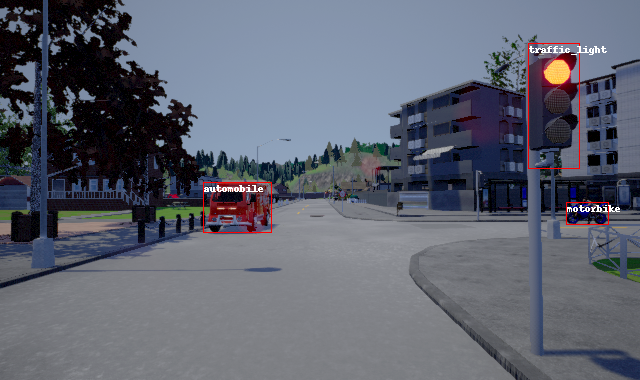

In [16]:
from typing import List, Dict, Any
import PIL
from PIL import ImageDraw

train_image_path = os.path.join(cwd, "images", "train", image['file_name'])
img = Image.open(train_image_path)

def draw_bboxes(img: PIL.Image, annotations: List[Dict[str, Any]]) -> PIL.Image:
    # Convert to RGB if it has an alpha channel
    if img.mode == 'RGBA':
        img = img.convert('RGB')

    draw = ImageDraw.Draw(img)

    for annotation in annotations:
        x_min, y_min, abs_width, abs_height = annotation["bbox"]
        class_idx = annotation["category_id"]
        draw.rectangle(
            (
                x_min,
                y_min,
                x_min + abs_width,
                y_min + abs_height
            ),
            outline="red",
            width=1
        )
        draw.text((x_min + 1, y_min + 1), idx2label[class_idx], fill="white")

    return img

demo_img = draw_bboxes(img, annotations)
demo_img.save(f"{train_label.split('.')[0]}_annotated.png")
demo_img

In [17]:
coco_train_data = {
    "info": {
        "year": datetime.utcnow().year,
        "version": "2.0",
        "description": "COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)",
        "contributor": "DanielHfnr, yunusskeete",
        "url": "",
        "date_created": datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    },
    "images": [],
    "annotations": [],
    "categories": [{"id": k, "name": v, "supercategory": "traffic_control" if "traffic" in v else "vehicle"} for k, v in idx2label.items()],
    "licenses": [
        {
            "url": "https://opensource.org/license/mit/",
            "id": 1,
            "name": "MIT License"
        }
    ]
}

train_labels = os.listdir("./labels/train")
for idx, train_label in enumerate(train_labels, 1):
    train_label_path = os.path.join(cwd, "labels", "train", train_label)

    image, annotations = xml_to_coco(train_label_path, idx)

    coco_train_data["images"].append(image)
    coco_train_data["annotations"].extend(annotations)

# Save COCO data to a JSON file
with open("train.json", "w") as json_file:
    json.dump(coco_train_data, json_file, indent=4)

In [18]:
coco_test_data = {
    "info": {
        "year": datetime.utcnow().year,
        "version": "2.0",
        "description": "COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)",
        "contributor": "DanielHfnr, yunusskeete",
        "url": "",
        "date_created": datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    },
    "images": [],
    "annotations": [],
    "categories": [{"id": k, "name": v, "supercategory": "traffic_control" if "traffic" in v else "vehicle"} for k, v in idx2label.items()],
    "licenses": [
        {
            "url": "https://opensource.org/license/mit/",
            "id": 1,
            "name": "MIT License"
        }
    ]
}

test_labels = os.listdir("./labels/test")
for idx, test_label in enumerate(test_labels, 1):
    test_label_path = os.path.join(cwd, "labels", "test", test_label)

    image, annotations = xml_to_coco(test_label_path, idx)

    coco_test_data["images"].append(image)
    coco_test_data["annotations"].extend(annotations)

# Save COCO data to a JSON file
with open("test.json", "w") as json_file:
    json.dump(coco_test_data, json_file, indent=4)

In [19]:
coco_train_data["images"]

[{'id': 'Town01_001020',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001020.png',
  'license': 1,
  'date_captured': '2023-11-29 12:27:40'},
 {'id': 'Town01_001080',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001080.png',
  'license': 2,
  'date_captured': '2023-11-29 12:27:40'},
 {'id': 'Town01_001140',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001140.png',
  'license': 3,
  'date_captured': '2023-11-29 12:27:40'},
 {'id': 'Town01_001200',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001200.png',
  'license': 4,
  'date_captured': '2023-11-29 12:27:40'},
 {'id': 'Town01_001260',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001260.png',
  'license': 5,
  'date_captured': '2023-11-29 12:27:40'},
 {'id': 'Town01_001320',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001320.png',
  'license': 6,
  'date_captured': '2023-11-29 12:27:40'},
 {'id': 'Town01_001380',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_0

In [20]:
coco_train_data["annotations"]

[{'id': 1,
  'image_id': 'Town01_001440',
  'category_id': 5,
  'bbox': [384, 176, 18, 18],
  'area': 324,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001500',
  'category_id': 5,
  'bbox': [386, 176, 19, 18],
  'area': 342,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001620',
  'category_id': 4,
  'bbox': [362, 162, 5, 24],
  'area': 120,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001680',
  'category_id': 3,
  'bbox': [43, 201, 115, 103],
  'area': 11845,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001740',
  'category_id': 1,
  'bbox': [241, 181, 46, 37],
  'area': 1702,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 2,
  'image_id': 'Town01_001740',
  'category_id': 1,
  'bbox': [314, 193, 10, 8],
  'area': 80,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001800',
  'category_id': 1,
  'bbox': [310, 191, 20, 19],
  'area': 380,
  'iscrowd': 0,


In [21]:
coco_train_data["categories"]

[{'id': 1, 'name': 'automobile', 'supercategory': 'vehicle'},
 {'id': 2, 'name': 'bike', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'motorbike', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'traffic_light', 'supercategory': 'traffic_control'},
 {'id': 5, 'name': 'traffic_sign', 'supercategory': 'traffic_control'}]

In [22]:
# import json

# with open("coco.json", "r") as json_file:
#     coco_train_data = json.load(json_file)

# coco_train_data.keys()

In [23]:
coco_train_data.keys()

dict_keys(['info', 'images', 'annotations', 'categories', 'licenses'])

In [24]:
len(coco_train_data["images"]), len(coco_train_data["annotations"])

(779, 2556)

In [25]:
coco_train_data["images"][:3]

[{'id': 'Town01_001020',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001020.png',
  'license': 1,
  'date_captured': '2023-11-29 12:27:40'},
 {'id': 'Town01_001080',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001080.png',
  'license': 2,
  'date_captured': '2023-11-29 12:27:40'},
 {'id': 'Town01_001140',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001140.png',
  'license': 3,
  'date_captured': '2023-11-29 12:27:40'}]

In [26]:
coco_train_data["annotations"][-3:]

[{'id': 2,
  'image_id': 'Town04_005040',
  'category_id': 1,
  'bbox': [184, 187, 55, 19],
  'area': 1045,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 3,
  'image_id': 'Town04_005040',
  'category_id': 1,
  'bbox': [118, 186, 49, 12],
  'area': 588,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 4,
  'image_id': 'Town04_005040',
  'category_id': 1,
  'bbox': [244, 179, 77, 66],
  'area': 5082,
  'iscrowd': 0,
  'segmentation': []}]

In [27]:
[annotation for annotation in coco_train_data["annotations"] if annotation["image_id"] == "005040"]

[]

In [28]:
coco_train_data["annotations"]

[{'id': 1,
  'image_id': 'Town01_001440',
  'category_id': 5,
  'bbox': [384, 176, 18, 18],
  'area': 324,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001500',
  'category_id': 5,
  'bbox': [386, 176, 19, 18],
  'area': 342,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001620',
  'category_id': 4,
  'bbox': [362, 162, 5, 24],
  'area': 120,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001680',
  'category_id': 3,
  'bbox': [43, 201, 115, 103],
  'area': 11845,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001740',
  'category_id': 1,
  'bbox': [241, 181, 46, 37],
  'area': 1702,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 2,
  'image_id': 'Town01_001740',
  'category_id': 1,
  'bbox': [314, 193, 10, 8],
  'area': 80,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001800',
  'category_id': 1,
  'bbox': [310, 191, 20, 19],
  'area': 380,
  'iscrowd': 0,


In [29]:
import random

image = random.choices(coco_train_data["images"], k=1).pop()
print(f"image: {image}")
annotations = [annotation for annotation in coco_train_data["annotations"] if annotation["image_id"] == image["id"]]
len(annotations), annotations

image: {'id': 'Town02_009000', 'width': 640, 'height': 380, 'file_name': 'Town02_009000.png', 'license': 344, 'date_captured': '2023-11-29 12:27:40'}


(2,
 [{'id': 1,
   'image_id': 'Town02_009000',
   'category_id': 1,
   'bbox': [294, 201, 52, 65],
   'area': 3380,
   'iscrowd': 0,
   'segmentation': []},
  {'id': 2,
   'image_id': 'Town02_009000',
   'category_id': 5,
   'bbox': [477, 152, 51, 48],
   'area': 2448,
   'iscrowd': 0,
   'segmentation': []}])

image id: Town03_018240


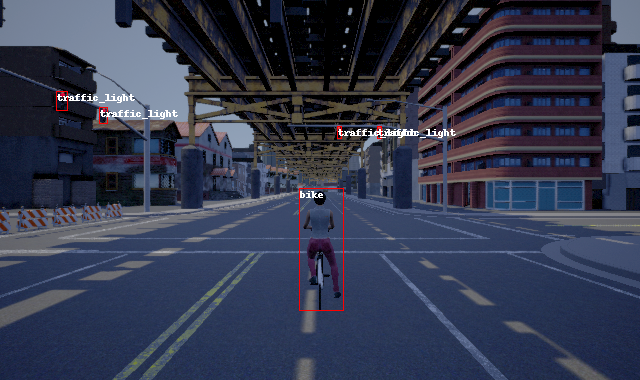

image id: Town01_001260


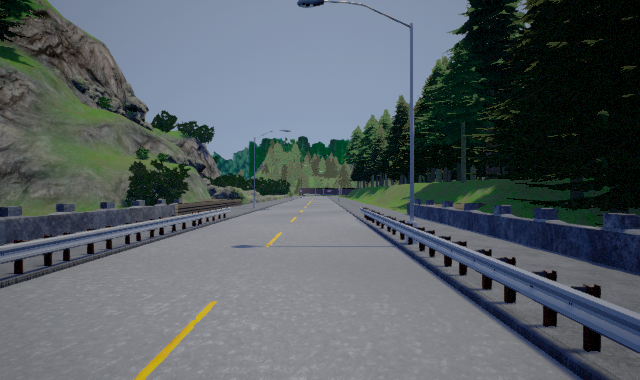

image id: Town02_010440


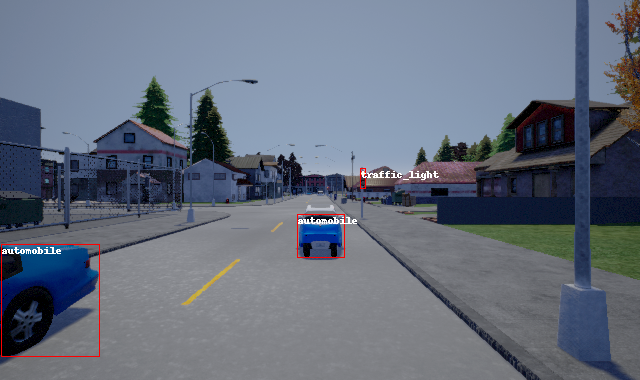

image id: Town01_009300


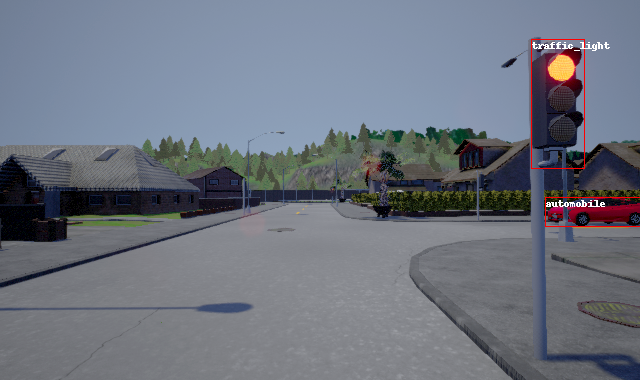

image id: Town01_001140


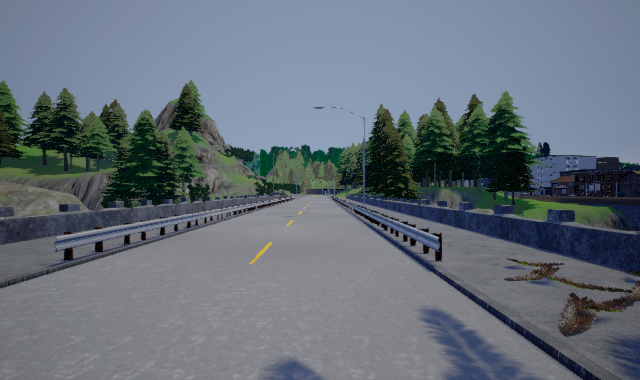

image id: Town02_008820


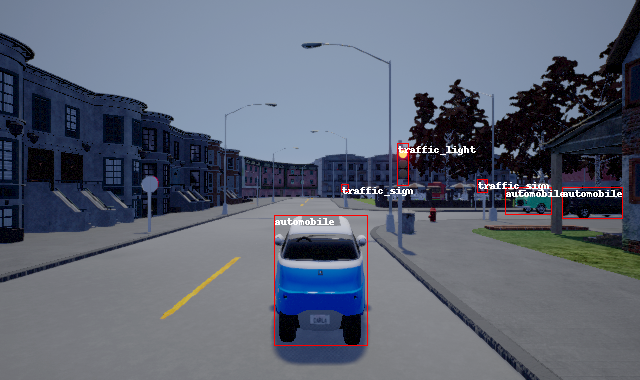

image id: Town03_015100


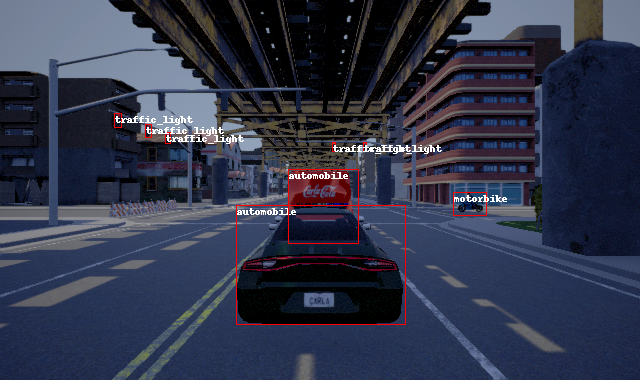

image id: Town02_006180


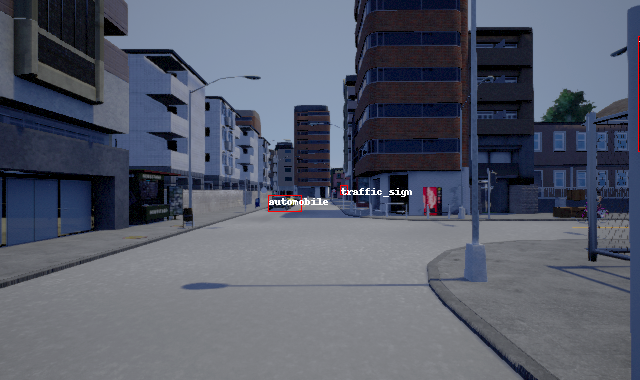

image id: Town01_008160


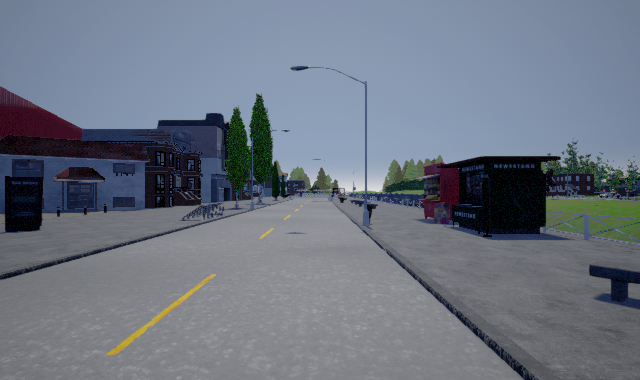

image id: Town01_005520


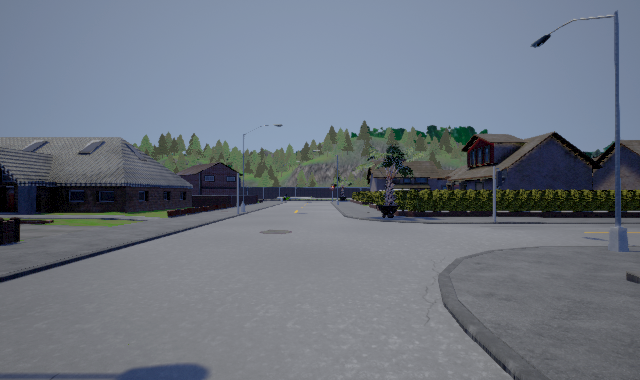

In [30]:
from IPython.display import display
import random

for image in random.choices(coco_train_data["images"], k=10):
    print(f"image id: {image['id']}")
    annotations = [annotation for annotation in coco_train_data["annotations"] if annotation["image_id"] == image["id"]]

    train_image_path = os.path.join(cwd, "images", "train", image['file_name'])
    img = Image.open(train_image_path)

    display(draw_bboxes(img, annotations))